## IMPORT & DATA LOAD

In [104]:
import re
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from tensorflow.keras import Input
from nltk.stem import PorterStemmer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from keras.utils.vis_utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import elu
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
train = pd.read_csv('data/fake-news/train.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test = pd.read_csv('data/fake-news/test.csv')

In [5]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
print("train 개수 :", len(train))

train 개수 : 20800


In [7]:
print("test 개수 :", len(test))

test 개수 : 5200


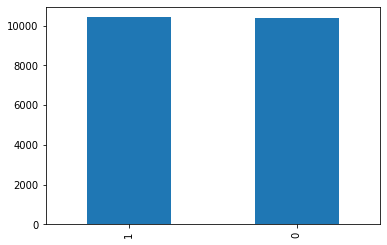

In [8]:
train['label'].value_counts().plot(kind='bar')

In [9]:
train.isnull().values.any()

True

In [10]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [12]:
train = train.fillna('NA')
test = test.fillna('NA')

## DATASET PREPROCESSING

#### 1. lower casing

In [13]:
train['title'] = train['title'].str.lower()
train['author'] = train['author'].str.lower()
train['text'] = train['text'].str.lower()

In [14]:
test['title'] = test['title'].str.lower()
test['author'] = test['author'].str.lower()
test['text'] = test['text'].str.lower()

#### 2. punctuation and stop-word removal

In [15]:
train['title'] = train['title'].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ").astype('string')
train['title'] = train['title'].str.replace(r"\'s", " \'s").astype('string')
train['title'] = train['title'].str.replace(r"\'ve", " \'ve").astype('string')
train['title'] = train['title'].str.replace(r"n\'t", " n\'t").astype('string')
train['title'] = train['title'].str.replace(r"\'re", " \'re").astype('string')
train['title'] = train['title'].str.replace(r"\'d", " \'d").astype('string')
train['title'] = train['title'].str.replace(r"\'ll", " \'ll").astype('string')
train['title'] = train['title'].str.replace(r",", " , ").astype('string')
train['title'] = train['title'].str.replace(r"!", " ! ").astype('string')
train['title'] = train['title'].str.replace(r"\(", " \( ").astype('string')
train['title'] = train['title'].str.replace(r"\)", " \) ").astype('string')
train['title'] = train['title'].str.replace(r"\?", " \? ").astype('string')
train['title'] = train['title'].str.replace(r"\s{2,}", " ").astype('string')

In [16]:
train['text'] = train['text'].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ").astype('string')
train['text'] = train['text'].str.replace(r"\'s", " \'s").astype('string')
train['text'] = train['text'].str.replace(r"\'ve", " \'ve").astype('string')
train['text'] = train['text'].str.replace(r"n\'t", " n\'t").astype('string')
train['text'] = train['text'].str.replace(r"\'re", " \'re").astype('string')
train['text'] = train['text'].str.replace(r"\'d", " \'d").astype('string')
train['text'] = train['text'].str.replace(r"\'ll", " \'ll").astype('string')
train['text'] = train['text'].str.replace(r",", " , ").astype('string')
train['text'] = train['text'].str.replace(r"!", " ! ").astype('string')
train['text'] = train['text'].str.replace(r"\(", " \( ").astype('string')
train['text'] = train['text'].str.replace(r"\)", " \) ").astype('string')
train['text'] = train['text'].str.replace(r"\?", " \? ").astype('string')
train['text'] = train['text'].str.replace(r"\s{2,}", " ").astype('string')

In [17]:
test['title'] = test['title'].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ").astype('string')
test['title'] = test['title'].str.replace(r"\'s", " \'s").astype('string')
test['title'] = test['title'].str.replace(r"\'ve", " \'ve").astype('string')
test['title'] = test['title'].str.replace(r"n\'t", " n\'t").astype('string')
test['title'] = test['title'].str.replace(r"\'re", " \'re").astype('string')
test['title'] = test['title'].str.replace(r"\'d", " \'d").astype('string')
test['title'] = test['title'].str.replace(r"\'ll", " \'ll").astype('string')
test['title'] = test['title'].str.replace(r",", " , ").astype('string')
test['title'] = test['title'].str.replace(r"!", " ! ").astype('string')
test['title'] = test['title'].str.replace(r"\(", " \( ").astype('string')
test['title'] = test['title'].str.replace(r"\)", " \) ").astype('string')
test['title'] = test['title'].str.replace(r"\?", " \? ").astype('string')


In [18]:
test['text'] = test['text'].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ").astype('string')
test['text'] = test['text'].str.replace(r"\'s", " \'s").astype('string')
test['text'] = test['text'].str.replace(r"\'ve", " \'ve").astype('string')
test['text'] = test['text'].str.replace(r"n\'t", " n\'t").astype('string')
test['text'] = test['text'].str.replace(r"\'re", " \'re").astype('string')
test['text'] = test['text'].str.replace(r"\'d", " \'d").astype('string')
test['text'] = test['text'].str.replace(r"\'ll", " \'ll").astype('string')
test['text'] = test['text'].str.replace(r",", " , ").astype('string')
test['text'] = test['text'].str.replace(r"!", " ! ").astype('string')
test['text'] = test['text'].str.replace(r"\(", " \( ").astype('string')
test['text'] = test['text'].str.replace(r"\)", " \) ").astype('string')
test['text'] = test['text'].str.replace(r"\?", " \? ").astype('string')
test['text'] = test['text'].str.replace(r"\s{2,}", " ").astype('string')

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
train['title'] = train['title'].apply(lambda x: " ".join([item for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [21]:
train['text'] = train['text'].apply(lambda x: " ".join([item for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [22]:
test['title'] = test['title'].apply(lambda x: " ".join([item for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [23]:
test['text'] = test['text'].apply(lambda x: " ".join([item for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

#### 3. stemming

PorterStemmer - 변경해보기

In [24]:
train['title'] = train['title'].apply(lambda x: " ".join([PorterStemmer().stem(item) for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [25]:
train['text'] = train['text'].apply(lambda x: " ".join([PorterStemmer().stem(item) for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [26]:
test['title'] = test['title'].apply(lambda x: " ".join([PorterStemmer().stem(item) for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [27]:
test['text'] = test['text'].apply(lambda x: " ".join([PorterStemmer().stem(item) for item in x.split() if item not in stop_words]) if pd.notnull(x) else x)

In [28]:
train.to_csv('data/fake-news/train_after_preprocessing.csv')

In [29]:
test.to_csv('data/fake-news/test_after_preprocessing.csv')

#### 4. tokenization

In [30]:
train.head()

,id,title,author,text,label
0,0,hous dem aid even see comey letter jason chaff...,darrell lucus,hous dem aid even see comey letter jason chaff...,1
1,1,"flynn hillari clinton , big woman campu breitbart",daniel j. flynn,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire,consortiumnews.com,"truth might get fire octob 29 , 2016 tension i...",1
3,3,15 civilian kill singl us airstrik identifi,jessica purkiss,video 15 civilian kill singl us airstrik ident...,1
4,4,iranian woman jail fiction unpublish stori wom...,howard portnoy,print iranian woman sentenc six year prison ir...,1


In [31]:
X_text = train['text']
X_author = train['author']
y = train['label']

In [113]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_text)
text_tokenized = tokenizer.texts_to_sequences(X_text)
author_tokenized = tokenizer.texts_to_sequences(X_author)

In [114]:
word_to_index = tokenizer.word_index
len(word_to_index)

115797

기사의 최대 길이 : 12257
기사의 평균 길이 : 424.586010


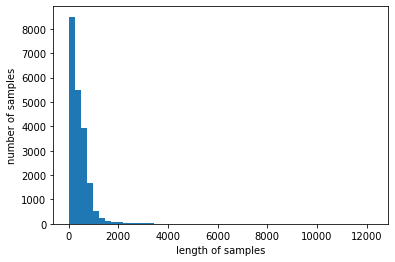

In [115]:
print("기사의 최대 길이 : %d" %(max(len(l) for l in text_tokenized)))
print("기사의 평균 길이 : %f" %(sum(map(len, text_tokenized))/len(text_tokenized)))

plt.hist([len(s) for s in text_tokenized], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

padding size : 100 -> 변경해보기

In [116]:
max_len_text = 100
max_len_author = 2
text_padded = pad_sequences(text_tokenized, maxlen=max_len_text)
author_padded = pad_sequences(author_tokenized, maxlen=max_len_author)

In [117]:
X_text_train, X_text_test, X_author_train, X_author_test, y_train, y_test = train_test_split(text_padded, author_padded, y, test_size=0.1, random_state=525)

In [118]:
print(len(X_text_train), len(X_text_test))
print(len(X_author_train), len(X_author_test))
print(len(y_train), len(y_test))

18720 2080
18720 2080
18720 2080


## MODEL CONSTRUCTION

### Text Part

#### 1. Embedding

In [119]:
# model1 = Sequential()

In [120]:
text_input = Input(shape=(100))

In [121]:
vocab_size = 50000
output_dim = 100
input_dim = max_len_text
Embedding1 = Embedding(vocab_size, output_dim, input_length=input_dim)(text_input)

In [122]:
# model1.summary()

#### 2. Conv

In [123]:
filter_num = 32
filter_size = 5
Conv1 = Conv1D(filter_num, filter_size, input_shape=(None, 100, 100), activation='elu', activity_regularizer='l2')(Embedding1)

In [124]:
# model1.summary()

#### 3. Maxpooling

In [125]:
Maxpooling1 = MaxPool1D(pool_size=5)(Conv1)

In [126]:
# model1.summary()

In [127]:
Flatten1 = Flatten()(Maxpooling1)

In [128]:
# model1.summary()

### Author Part

#### 1. Embedding

In [129]:
# model2 = Sequential()

In [130]:
author_input = Input(shape=(2))

In [131]:
output_dim_author = 2
input_dim_author = max_len_author
Embedding2 = Embedding(vocab_size, output_dim_author, input_length=input_dim_author)(author_input)

In [132]:
# model2.summary()

#### 2. Conv

In [133]:
filter_num = 32
filter_size = 2
Conv2 = Conv1D(filter_num, filter_size, input_shape=(None, 2, 2), activation='elu', activity_regularizer='l2')(Embedding2)

In [134]:
# model2.summary()

#### 3. Flatten

In [135]:
Flatten2 = Flatten()(Conv2)

In [136]:
# model2.summary()

### Concatenate two models

In [137]:
Concate = Concatenate()([Flatten1, Flatten2])

In [138]:
output_layer = Dense(1, activation='sigmoid')(Concate)

In [139]:
model = Model(inputs=[text_input, author_input], outputs=[output_layer])

In [140]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 100, 100)     5000000     input_4[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 96, 32)       16032       embedding_7[0][0]                
____________________________________________________________________________________________

In [141]:
model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'acc' ] )

In [142]:
history = model.fit([X_text_train, X_author_train], y_train, epochs=50)

Train on 18720 samples
Epoch 1/50
18720/18720 [==============================] - 28s 1ms/sample - loss: 0.3129 - acc: 0.9072
Epoch 2/50
18720/18720 [==============================] - 27s 1ms/sample - loss: 0.0975 - acc: 0.9824
Epoch 3/50
18720/18720 [==============================] - 28s 2ms/sample - loss: 0.0616 - acc: 0.9901
Epoch 4/50
18720/18720 [==============================] - 32s 2ms/sample - loss: 0.0472 - acc: 0.9926
Epoch 5/50
18720/18720 [==============================] - 32s 2ms/sample - loss: 0.0375 - acc: 0.9952
Epoch 6/50
18720/18720 [==============================] - 33s 2ms/sample - loss: 0.0338 - acc: 0.9942
Epoch 7/50
18720/18720 [==============================] - 33s 2ms/sample - loss: 0.0314 - acc: 0.9948
Epoch 8/50
18720/18720 [==============================] - 37s 2ms/sample - loss: 0.0297 - acc: 0.9952
Epoch 9/50
18720/18720 [==============================] - 34s 2ms/sample - loss: 0.0273 - acc: 0.9955
Epoch 10/50
18720/18720 [==============================] - 

In [143]:
results = model.evaluate([X_text_test, X_author_test], y_test)
y_pred = model.predict([X_text_test, X_author_test])

2080/2080 [==============================] - 0s 164us/sample - loss: 0.1393 - acc: 0.9673


In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1028
           1       0.95      0.98      0.97      1052

    accuracy                           0.97      2080
   macro avg       0.97      0.97      0.97      2080
weighted avg       0.97      0.97      0.97      2080

